In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_log_error as rmsle
from sklearn.metrics import root_mean_squared_error

In [ ]:
#data set from kaggle: https://www.kaggle.com/competitions/grupo-bimbo-inventory-demand/data

#office
bgtrain = pd.read_csv("train.csv")
clients = pd.read_csv("cliente_tabla.csv")
#town_state = pd.read_csv("../../Desktop/work/data science/project/bakery data/town_state.csv")
#product_name = pd.read_csv("../../Desktop/work/data science/project/bakery data/producto_tabla.csv")
bgtest = pd.read_csv("test.csv")
#sample_submission = pd.read_csv("../../Desktop/work/data science/project/bakery data/sample_submission.csv")


In [57]:
bgtrain = bgtrain.rename(columns={'Semana': 'Week_num',
                                  'Agencia_ID': 'Sales_Depot_ID',
                                  'Canal_ID': 'Sales_Channel_ID',
                                  'Ruta_SAK': 'Route_ID',
                                  'Cliente_ID': 'Client_ID',
                                  'Venta_uni_hoy': 'Sales_unit_this_week',
                                  'Venta_hoy': 'Sales_this_week',
                                  'Dev_uni_proxima': 'Returns_unit_next_week',
                                  'Dev_proxima': 'Returns_next_week',
                                  'Demanda_uni_equil': 'Adjusted_demand',
                                  'Producto_ID': 'Product_ID'})

bgtest = bgtest.rename(columns={'Semana': 'Week_num',
                                  'Agencia_ID': 'Sales_Depot_ID',
                                  'Canal_ID': 'Sales_Channel_ID',
                                  'Ruta_SAK': 'Route_ID',
                                  'Cliente_ID': 'Client_ID',
                                  'Venta_uni_hoy': 'Sales_unit_this_week',
                                  'Venta_hoy': 'Sales_this_week',
                                  'Dev_uni_proxima': 'Returns_unit_next_week',
                                  'Dev_proxima': 'Returns_next_week',
                                  'Demanda_uni_equil': 'Adjusted_demand',
                                  'Producto_ID': 'Product_ID'})

In [58]:
bgtrain[(bgtrain['Client_ID'] == 653378) & (bgtrain['Product_ID'] == 42128) & (bgtrain['Week_num'] == 8)]

,Week_num,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,Sales_unit_this_week,Sales_this_week,Returns_unit_next_week,Returns_next_week,Adjusted_demand
55425215,8,1228,5,3001,653378,42128,194,1796.44,0,0.00,194
55425297,8,1228,5,3002,653378,42128,206,1907.56,0,0.00,206
55425391,8,1228,5,3004,653378,42128,231,2139.06,0,0.00,231
55425439,8,1228,5,3010,653378,42128,202,1870.52,0,0.00,202
55425522,8,1228,5,3014,653378,42128,215,1990.90,0,0.00,215
...,...,...,...,...,...,...,...,...,...,...,...
63397533,8,4087,5,3009,653378,42128,1,9.26,0,0.00,1
63397559,8,4089,5,3001,653378,42128,125,1157.50,1,9.26,124
63397609,8,4089,5,3002,653378,42128,121,1120.46,26,240.76,95
63397658,8,4089,5,3003,653378,42128,135,1250.10,0,0.00,135


In [59]:
bgtest[(bgtest['Client_ID'] == 653378) & (bgtest['Product_ID'] == 42128)]

,id,Week_num,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID
12017,12017,10,2243,5,3006,653378,42128
65584,65584,11,2231,5,3004,653378,42128
78905,78905,11,1250,5,3001,653378,42128
80186,80186,11,2231,5,3001,653378,42128
82318,82318,10,4082,5,3004,653378,42128
...,...,...,...,...,...,...,...
6914167,6914167,10,1255,5,3001,653378,42128
6957640,6957640,10,2255,5,3001,653378,42128
6973868,6973868,10,1484,5,3003,653378,42128
6985629,6985629,11,2255,5,3002,653378,42128


In [61]:
clients[clients['Cliente_ID'] == 653378]

,Cliente_ID,NombreCliente
232168,653378,PUEBLA REMISION


Improve the simple_prediction.csv file by making guesses for new clients and/or products by using averages.

In [2]:
#data set from kaggle: https://www.kaggle.com/competitions/grupo-bimbo-inventory-demand/data

#office
train = pd.read_csv("train.csv", usecols=['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Producto_ID', 'Cliente_ID', 'Demanda_uni_equil'])
test = pd.read_csv("test.csv", usecols=['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Producto_ID', 'Cliente_ID', 'id'])

train = train.rename(columns={'Semana': 'Week_num',
                              'Agencia_ID': 'Sales_Depot_ID',
                              'Canal_ID': 'Sales_Channel_ID',
                              'Ruta_SAK': 'Route_ID',
                              'Cliente_ID': 'Client_ID',
                              'Venta_uni_hoy': 'Sales_unit_this_week',
                              'Venta_hoy': 'Sales_this_week',
                              'Dev_uni_proxima': 'Returns_unit_next_week',
                              'Dev_proxima': 'Returns_next_week',
                              'Demanda_uni_equil': 'adjusted_demand',
                              'Producto_ID': 'Product_ID'})

test = test.rename(columns={'Semana': 'Week_num',
                            'Agencia_ID': 'Sales_Depot_ID',
                            'Canal_ID': 'Sales_Channel_ID',
                            'Ruta_SAK': 'Route_ID',
                            'Cliente_ID': 'Client_ID',
                            'Venta_uni_hoy': 'Sales_unit_this_week',
                            'Venta_hoy': 'Sales_this_week',
                            'Dev_uni_proxima': 'Returns_unit_next_week',
                            'Dev_proxima': 'Returns_next_week',
                            'Demanda_uni_equil': 'adjusted_demand',
                            'Producto_ID': 'Product_ID'})



#set a unique id for each sales depot id, sales channel id, route id, client, product combination (thanks Gemini)
combined_df = pd.concat([train,test])
combined_df['ID'] = combined_df.groupby(['Sales_Depot_ID', 'Sales_Channel_ID', 'Route_ID', 'Client_ID', 'Product_ID']).ngroup()

#set a combined client ID, consisting of a unique sales depot ID, sales channel ID, route ID, and client ID
combined_df['ccid'] = combined_df.groupby(['Sales_Depot_ID', 'Sales_Channel_ID', 'Route_ID', 'Client_ID']).ngroup()

#set a combined product ID, consisting of a unique sales depot ID, sales channel ID, route ID, and product ID
combined_df['cpid'] = combined_df.groupby(['Sales_Depot_ID', 'Sales_Channel_ID', 'Route_ID', 'Product_ID']).ngroup()

train = combined_df.iloc[:len(train)].copy()
test = combined_df.iloc[len(train):].copy()

del combined_df


train = train.drop(columns='id')
train['adjusted_demand'] = train['adjusted_demand'].astype(int)
train = train.sort_values(by=['ID', 'Week_num']).reset_index(drop=True)

test = test.drop(columns='adjusted_demand')
test['id'] = test['id'].astype(int)
test = test.sort_values(by=['ID', 'Week_num']).reset_index(drop=True)

In [3]:
#create a dataframe of aggregate statistics for each client
testagg = train.sort_values(by=['ccid']).groupby(['ccid'], as_index=False).agg({'Product_ID':'nunique', 'adjusted_demand':['mean', 'median', 'min', 'max']})

client_stats = pd.DataFrame()

client_stats['ccid'] = testagg['ccid']
client_stats['Products'] = testagg['Product_ID']['nunique']
client_stats['adj_dem_mean'] = testagg['adjusted_demand']['mean'].round(2)
client_stats['adj_dem_median'] = testagg['adjusted_demand']['median'].astype(int)
client_stats['adj_dem_min'] = testagg['adjusted_demand']['min']
client_stats['adj_dem_max'] = testagg['adjusted_demand']['max']

del testagg

#create a dataframe of aggregate statistics for each product
testagg = train.sort_values(by=['cpid']).groupby(['cpid'], as_index=False).agg({'Client_ID':'nunique', 'adjusted_demand':['mean', 'median', 'min', 'max']})

product_stats =  pd.DataFrame()

product_stats['cpid'] = testagg['cpid']
product_stats['Clients'] = testagg['Client_ID']['nunique']
product_stats['adj_dem_mean'] = testagg['adjusted_demand']['mean'].round(2)
product_stats['adj_dem_median'] = testagg['adjusted_demand']['median'].astype(int)
product_stats['adj_dem_min'] = testagg['adjusted_demand']['min']
product_stats['adj_dem_max'] = testagg['adjusted_demand']['max']
product_stats['median_pct'] = product_stats['adj_dem_median'].rank(pct=True, method='average')

del testagg

In [124]:
client_stats.head()

,ccid,Products,adj_dem_mean,adj_dem_median,adj_dem_min,adj_dem_max
0,0,43,5.52,4,1,23
1,1,3,15.94,18,1,30
2,2,4,15.15,11,2,38
3,3,5,11.86,5,1,100
4,4,4,14.14,6,1,45


In [ ]:
#verify client_stats, product_stats was done as intended

for i in range(15):
    randCID = np.random.choice(train['ccid'].unique().tolist())
    randPID = np.random.choice(train['cpid'].unique().tolist())

    assert(client_stats[(client_stats['ccid'] == randCID)]['adj_dem_mean'].iloc[0] == train[(train['ccid'] == randCID)]['adjusted_demand'].mean().round(2))
    assert(product_stats[(product_stats['cpid'] == randPID)]['adj_dem_mean'].iloc[0] == train[(train['cpid'] == randPID)]['adjusted_demand'].mean().round(2))

In [125]:
train_pred = test[['ID', 'Client_ID', 'Product_ID', 'ccid', 'cpid']].copy(deep=True)

# are the cpid, ccids in the training data?
train_pred.loc[:, 'cpid_in_train'] = train_pred['cpid'].isin(train['cpid'].unique().tolist())
train_pred.loc[:, 'ccid_in_train'] = train_pred['ccid'].isin(train['ccid'].unique().tolist())

# get ccid, cpid means, medians and cpid median percentage
cidmapping = pd.Series(client_stats[client_stats['ccid'].isin(train_pred['ccid'].unique().tolist())].set_index('ccid')['adj_dem_mean'], index=client_stats[client_stats['ccid'].isin(train_pred['ccid'].unique().tolist())]['ccid']).to_dict()
train_pred['ccid_mean'] = train_pred['ccid'].map(cidmapping)

cidmapping = pd.Series(client_stats[client_stats['ccid'].isin(train_pred['ccid'].unique().tolist())].set_index('ccid')['adj_dem_median'], index=client_stats[client_stats['ccid'].isin(train_pred['ccid'].unique().tolist())]['ccid']).to_dict()
train_pred['ccid_median'] = train_pred['ccid'].map(cidmapping)

pidmapping = pd.Series(product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())].set_index('cpid')['adj_dem_mean'], index=product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())]['cpid']).to_dict()
train_pred['cpid_mean'] = train_pred['cpid'].map(pidmapping)

pidmapping = pd.Series(product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())].set_index('cpid')['adj_dem_median'], index=product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())]['cpid']).to_dict()
train_pred['cpid_median'] = train_pred['cpid'].map(pidmapping)

pidmapping = pd.Series(product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())].set_index('cpid')['median_pct'], index=product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())]['cpid']).to_dict()
train_pred['cpid_median_pct'] = train_pred['cpid'].map(pidmapping).round(3)

del cidmapping, pidmapping

In [126]:
train_pred.head()

,ID,Client_ID,Product_ID,ccid,cpid,cpid_in_train,ccid_in_train,ccid_mean,ccid_median,cpid_mean,cpid_median,cpid_median_pct
0,3,15766,1216,0,16,True,True,5.52,4.0,2.25,2.0,0.231
1,6,15766,1240,0,20,True,True,5.52,4.0,4.51,4.0,0.492
2,7,15766,1242,0,21,True,True,5.52,4.0,2.89,3.0,0.387
3,10,15766,1643,0,25,True,True,5.52,4.0,5.89,3.0,0.387
4,12,15766,3894,0,31,True,True,5.52,4.0,5.30,5.0,0.575


In [ ]:
# put it all together!

# initialize adjusted demand column
train_pred['adj_dem_guess'] = np.zeros(len(test))

# for ccid and cpid not in training data, set adjusted demand to 5
train_pred.loc[(train_pred['cpid_in_train'] == False) & (train_pred['ccid_in_train'] == False), 'adj_dem_guess'] = 5

# for cpid in training data and ccid not in training data, use cpid median
train_pred.loc[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True), 'adj_dem_guess'] = train_pred[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True)]['cpid_median']

# for ccid in training data and cpid not in training data, use ccid median
train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False), 'adj_dem_guess'] = train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False)]['ccid_median']

# for ccid, cpid in training data, use (0.5 + (cpid median pct)) * (0.65 * (ccid median) + (1-0.65) * (ccid mean))
train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True), 'adj_dem_guess'] = (0.5 + train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['cpid_median_pct'])*(0.65*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_median'] + (1-0.65)*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_mean'])



# override with week 8 adjusted demand for the IDs that have week 8 data
wk9mapping = pd.Series(train[(train['Week_num'] == 9)].set_index('ID')['adjusted_demand'], index=train[(train['Week_num'] == 9)]['ID']).to_dict()
train_pred.loc[train_pred['ID'].isin(train[(train['Week_num'] == 9)]['ID'].unique().tolist()), 'adj_dem_guess'] = train_pred['ID'].map(wk9mapping)
train_pred['adj_dem_guess'] = np.floor(train_pred['adj_dem_guess']).astype(int)


In [131]:
train_pred.head()

,ID,Client_ID,Product_ID,ccid,cpid,cpid_in_train,ccid_in_train,ccid_mean,ccid_median,cpid_mean,cpid_median,cpid_median_pct,adj_dem_guess
0,3,15766,1216,0,16,True,True,5.52,4.0,2.25,2.0,0.231,3
1,6,15766,1240,0,20,True,True,5.52,4.0,4.51,4.0,0.492,2
2,7,15766,1242,0,21,True,True,5.52,4.0,2.89,3.0,0.387,1
3,10,15766,1643,0,25,True,True,5.52,4.0,5.89,3.0,0.387,4
4,12,15766,3894,0,31,True,True,5.52,4.0,5.30,5.0,0.575,13


In [128]:
test.head()

,Week_num,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,id,ID,ccid,cpid
0,11,1110,7,3301,15766,1216,924190,3,0,16
1,11,1110,7,3301,15766,1240,4521987,6,0,20
2,10,1110,7,3301,15766,1242,6217476,7,0,21
3,10,1110,7,3301,15766,1643,4740450,10,0,25
4,10,1110,7,3301,15766,3894,970784,12,0,31


In [135]:
submission = pd.DataFrame()

submission['id'] = test['id']
submission['Demanda_uni_equil'] = train_pred['adj_dem_guess']

submission = submission.sort_values(by='id')

submission.to_csv('improved_simple_baseline.csv', index=False)

submission.head()

,id,Demanda_uni_equil
6558101,0,4
5991443,1,1
5398738,2,2
1383046,3,0
1110570,4,5


In [104]:
client_stats['adj_dem_median'].rank(pct=True, method='average')

0         0.982465
1         0.999044
2         0.997108
3         0.988877
4         0.988030
            ...   
880599    0.968893
880600    0.911670
880601    0.264064
880602    0.034901
880603    0.957764
Name: adj_dem_median, Length: 880604, dtype: float64

In [4]:
testID = test['ID'].unique().tolist()
trainID = train['ID'].unique().tolist()
commonID = list(set(testID).intersection(set(trainID)))
newID = list(set(testID) - set(trainID))

In [5]:
#verify that newID and commonID have the right number of elements

print(len(newID)+len(commonID))

print(len(test['ID'].unique()))

6225450
6225450


In [ ]:
#for a old client buying an old product that hasn't been purchased in the first 9 weeks, use aggregate stats for the client and product
#for a new client but old product, predict using the aggregate product stats
#for a new product but old client, predict using the aggregate client stats
#for a new product and new client, set adjusted demand to 7

In [127]:
newdf = test[test['ID'].isin(newID)].copy()

newdf.loc[:, 'Old_Product'] = newdf['Product_ID'].isin(train['Product_ID'].unique().tolist())
newdf.loc[:, 'Old_Client'] = newdf['Client_ID'].isin(train['Client_ID'].unique().tolist())
newdf.loc[:, 'adjusted_demand'] = 7*np.ones(len(newdf)).astype(int)
newdf['Client_mean'] = np.zeros(len(newdf))
newdf['Product_mean'] = np.zeros(len(newdf))

#set the mean of new clients or new products to NaN
newdf.loc[newdf['Old_Client'] == False, 'Client_mean'] = np.nan
newdf.loc[newdf['Old_Product'] == False, 'Product_mean'] = np.nan

#get product means
pidmapping = pd.Series(product_stats[product_stats['Product_ID'].isin(newdf['Product_ID'].unique().tolist())].set_index('Product_ID')['adj_dem_mean'], index=product_stats[product_stats['Product_ID'].isin(newdf['Product_ID'].unique().tolist())]['Product_ID']).to_dict()
newdf['Product_mean'] = newdf['Product_ID'].map(pidmapping)

#get client means
cidmapping = pd.Series(client_stats[client_stats['Client_ID'].isin(newdf['Client_ID'].unique().tolist())].set_index('Client_ID')['adj_dem_mean'], index=client_stats[client_stats['Client_ID'].isin(newdf['Client_ID'].unique().tolist())]['Client_ID']).to_dict()
newdf['Client_mean'] = newdf['Client_ID'].map(cidmapping)

#get client medians
cidmapping = pd.Series(client_stats[client_stats['Client_ID'].isin(newdf['Client_ID'].unique().tolist())].set_index('Client_ID')['adj_dem_median'], index=client_stats[client_stats['Client_ID'].isin(newdf['Client_ID'].unique().tolist())]['Client_ID']).to_dict()
newdf['Client_median'] = newdf['Client_ID'].map(cidmapping)


#if old client is new to buying old product, set the adjusted demand as the client mean
newdf.loc[(newdf['Old_Client'] == True) & (newdf['Old_Product'] == True), 'adjusted_demand'] = newdf[(newdf['Old_Client'] == True) & (newdf['Old_Product'] == True)]['Client_median']

#if old client is buying new product, set the adjusted demand as the ceiling of client mean
newdf.loc[(newdf['Old_Client'] == True) & (newdf['Old_Product'] == False), 'adjusted_demand'] = np.ceil(newdf[(newdf['Old_Client'] == True) & (newdf['Old_Product'] == False)]['Client_mean'])

#if new client is buying old product, set the adjusted demand as the floor of product mean
newdf.loc[(newdf['Old_Client'] == False) & (newdf['Old_Product'] == True), 'adjusted_demand'] = np.ceil(newdf[(newdf['Old_Client'] == False) & (newdf['Old_Product'] == True)]['Product_mean'])

#if new client is buying new product, set the adjusted demand to 3
newdf.loc[(newdf['Old_Client'] == False) & (newdf['Old_Product'] == False), 'adjusted_demand'] = 7

newdf['adjusted_demand'] = newdf['adjusted_demand'].astype(int)

newdf.head()

,Week_num,Client_ID,Product_ID,id,ID,Old_Product,Old_Client,adjusted_demand,Client_mean,Product_mean,Client_median
1,11,26,31520,4728674,6,True,True,20,28.10,28.06,20.0
13,10,26,43388,4837077,46,True,True,20,28.10,16.33,20.0
59,10,65,35305,592764,138,True,True,60,109.10,9.18,60.0
131,11,107,4767,460185,297,True,True,15,23.45,7.23,15.0
151,11,107,43027,2186063,334,True,True,15,23.45,49.05,15.0


In [4]:
spdf = pd.read_csv("simple_prediction.csv")

spdf.head()

,id,Demanda_uni_equil
0,0,4
1,1,7
2,2,2
3,3,7
4,4,7


In [5]:
newdf = newdf.sort_values(by=['id'])

adc = pd.DataFrame({'id': newdf['id'], 'adjusted_demand': newdf['adjusted_demand']})
adc.set_index('id', inplace=True)

adc.head()

,adjusted_demand
id,
1,3
3,3
4,3
7,6
15,6


In [8]:
spdf.loc[spdf['id'].isin(newdf['id']), 'Demanda_uni_equil'] = adc['adjusted_demand']

spdf.head()

,id,Demanda_uni_equil
0,0,4
1,1,3
2,2,2
3,3,3
4,4,3


In [9]:
spdf['Demanda_uni_equil'].value_counts()

Demanda_uni_equil
7       1806215
2        739913
4        702008
3        642351
5        622293
         ...   
706           1
856           1
835           1
1081          1
567           1
Name: count, Length: 899, dtype: int64

In [10]:
spdf.to_csv("improved_simple_prediction_with3.csv", index=False)

Predict adjusted demand for all clients and products by weighted means.

In [123]:
olddf = test[test['ID'].isin(commonID)].copy()

#get client means
cidmapping = pd.Series(client_stats[client_stats['Client_ID'].isin(olddf['Client_ID'].unique().tolist())].set_index('Client_ID')['adj_dem_mean'], index=client_stats[client_stats['Client_ID'].isin(olddf['Client_ID'].unique().tolist())]['Client_ID']).to_dict()
olddf['Client_mean'] = olddf['Client_ID'].map(cidmapping)

#get client medians
cidmapping = pd.Series(client_stats[client_stats['Client_ID'].isin(olddf['Client_ID'].unique().tolist())].set_index('Client_ID')['adj_dem_median'], index=client_stats[client_stats['Client_ID'].isin(olddf['Client_ID'].unique().tolist())]['Client_ID']).to_dict()
olddf['Client_median'] = olddf['Client_ID'].map(cidmapping)

#get product means
pidmapping = pd.Series(product_stats[product_stats['Product_ID'].isin(olddf['Product_ID'].unique().tolist())].set_index('Product_ID')['adj_dem_mean'], index=product_stats[product_stats['Product_ID'].isin(olddf['Product_ID'].unique().tolist())]['Product_ID']).to_dict()
olddf['Product_mean'] = olddf['Product_ID'].map(pidmapping)

#get product medians
pidmapping = pd.Series(product_stats[product_stats['Product_ID'].isin(olddf['Product_ID'].unique().tolist())].set_index('Product_ID')['adj_dem_median'], index=product_stats[product_stats['Product_ID'].isin(olddf['Product_ID'].unique().tolist())]['Product_ID']).to_dict()
olddf['Product_median'] = olddf['Product_ID'].map(pidmapping)

olddf.head()

,Week_num,Client_ID,Product_ID,id,ID,Client_mean,Client_median,Product_mean,Product_median
0,10,26,31518,1569352,5,28.1,20,13.88,10
2,11,26,34206,1547831,13,28.1,20,22.89,3
3,10,26,34210,6667200,14,28.1,20,120.78,80
4,10,26,34785,1592616,18,28.1,20,86.23,68
5,11,26,34785,6825659,18,28.1,20,86.23,68


In [17]:
#verify that means were imported correctly

for i in np.random.choice(olddf['ID'].unique().tolist(), size=25):
    assert(olddf.loc[olddf['ID'] == i, 'Client_mean'].iloc[0] == train[train['Client_ID'] == train[train['ID'] == i]['Client_ID'].iloc[0]]['adjusted_demand'].mean().round(2))
    assert(olddf.loc[olddf['ID'] == i, 'Product_mean'].iloc[0] == train[train['Product_ID'] == train[train['ID'] == i]['Product_ID'].iloc[0]]['adjusted_demand'].mean().round(2))

In [128]:
df = test[['ID', 'id']].copy(deep=True)

#column which is the adjusted demand from week 9 if the ID is present for week 9 and False otherwise
df['wk_9_adj_dem'] = df['ID'].isin(train[train['Week_num'] == 9]['ID'].unique().tolist())

wk9mapping = train[train['Week_num'] == 9].set_index('ID')['adjusted_demand'].to_dict()
df.loc[df['wk_9_adj_dem'] == True, 'wk_9_adj_dem'] = df[df['wk_9_adj_dem'] == True]['ID'].map(wk9mapping)

#create prediction column
df['Demanda_uni_equil'] = np.zeros(len(df)).astype(int)

#for those present in week 9, take that value for weeks 10, 11
df.loc[df['wk_9_adj_dem'] != False, 'Demanda_uni_equil'] = df[df['wk_9_adj_dem'] != False]['wk_9_adj_dem']

#for those present in the training data but not in week 9,
cids = df[(df['wk_9_adj_dem'] == False) & (df['ID'].isin(newID) == False)]['ID'].unique().tolist()
mapping = olddf[olddf['ID'].isin(cids) == True].set_index('ID')['Client_median'].to_dict()
df.loc[(df['wk_9_adj_dem'] == False) & (df['ID'].isin(newID) == False), 'Demanda_uni_equil'] = df[df['ID'].isin(cids) == True]['ID'].map(mapping)

cids = df[(df['wk_9_adj_dem'] == False) & (df['ID'].isin(newID) == True)]['ID'].unique().tolist()
mapping = newdf[newdf['ID'].isin(cids) == True].set_index('ID')['adjusted_demand'].to_dict()
df.loc[(df['wk_9_adj_dem'] == False) & (df['ID'].isin(newID) == True), 'Demanda_uni_equil'] = df[df['ID'].isin(cids) == True]['ID'].map(mapping)


df.head()

C:\Users\eblackst\AppData\Local\Temp\1\ipykernel_18748\1647564334.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[107  39  24 ...  10   3   8]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['wk_9_adj_dem'] == True, 'wk_9_adj_dem'] = df[df['wk_9_adj_dem'] == True]['ID'].map(wk9mapping)
C:\Users\eblackst\AppData\Local\Temp\1\ipykernel_18748\1647564334.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[107 39 24 ... 10 3 8]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['wk_9_adj_dem'] != False, 'Demanda_uni_equil'] = df[df['wk_9_adj_dem'] != False]['wk_9_adj_dem']


,ID,id,wk_9_adj_dem,Demanda_uni_equil
0,5,1569352,False,20
1,6,4728674,False,20
2,13,1547831,107,107
3,14,6667200,39,39
4,18,1592616,24,24


In [129]:
df[['id', 'Demanda_uni_equil']].sort_values(by=['id']).to_csv("more_improved_simple_prediction.csv", index=False)

In [59]:
for p in np.linspace(0,1,11):
    oldad = pd.DataFrame({'id': olddf['id'], 'Demanda_uni_equil': np.ceil(p*olddf['Client_mean'] + (1-p)*olddf['Product_mean'])}).astype(int)

    newdf.loc[(newdf['Old_Client'] == True) & (newdf['Old_Product'] == True), 'adjusted_demand'] = (p*(newdf[(newdf['Old_Client'] == True) & (newdf['Old_Product'] == True)]['Client_mean']) + (1-p)*(newdf[(newdf['Old_Client'] == True) & (newdf['Old_Product'] == True)]['Product_mean'])).round(0)
    newad = pd.DataFrame({'id': newdf['id'], 'Demanda_uni_equil': newdf['adjusted_demand']})

    adc = pd.concat([oldad, newad])
    adc = adc.sort_values(by=['id']).reset_index(drop=True)

    adc.to_csv(f"{(10*p).round(0).astype(int)}_mean_prediction.csv", index=False)

In [4]:
train_tt = train[train['Week_num'] <= 8]
train_ho = train[train['Week_num'] == 9]

#create a dataframe of aggregate statistics for each client
testagg = train_tt.sort_values(by=['ccid']).groupby(['ccid'], as_index=False).agg({'Product_ID':'nunique', 'adjusted_demand':['mean', 'median', 'min', 'max']})

client_stats = pd.DataFrame()

client_stats['ccid'] = testagg['ccid']
client_stats['Products'] = testagg['Product_ID']['nunique']
client_stats['adj_dem_mean'] = testagg['adjusted_demand']['mean'].round(2)
client_stats['adj_dem_median'] = testagg['adjusted_demand']['median'].astype(int)
client_stats['adj_dem_min'] = testagg['adjusted_demand']['min']
client_stats['adj_dem_max'] = testagg['adjusted_demand']['max']

del testagg

#create a dataframe of aggregate statistics for each product
testagg = train_tt.sort_values(by=['cpid']).groupby(['cpid'], as_index=False).agg({'Client_ID':'nunique', 'adjusted_demand':['mean', 'median', 'min', 'max']})

product_stats =  pd.DataFrame()

product_stats['cpid'] = testagg['cpid']
product_stats['Clients'] = testagg['Client_ID']['nunique']
product_stats['adj_dem_mean'] = testagg['adjusted_demand']['mean'].round(2)
product_stats['adj_dem_median'] = testagg['adjusted_demand']['median'].astype(int)
product_stats['adj_dem_min'] = testagg['adjusted_demand']['min']
product_stats['adj_dem_max'] = testagg['adjusted_demand']['max']
product_stats['median_pct'] = product_stats['adj_dem_median'].rank(pct=True, method='average')

del testagg

In [5]:
del train, test

In [6]:
train_pred = train_ho[['ID', 'Client_ID', 'Product_ID', 'ccid', 'cpid']].copy(deep=True)

# are the cpid, ccids in the training data?
train_pred.loc[:, 'cpid_in_train'] = train_pred['cpid'].isin(train_tt['cpid'].unique().tolist())
train_pred.loc[:, 'ccid_in_train'] = train_pred['ccid'].isin(train_tt['ccid'].unique().tolist())

# get ccid, cpid means, medians and cpid median percentage
cidmapping = pd.Series(client_stats[client_stats['ccid'].isin(train_pred['ccid'].unique().tolist())].set_index('ccid')['adj_dem_mean'], index=client_stats[client_stats['ccid'].isin(train_pred['ccid'].unique().tolist())]['ccid']).to_dict()
train_pred['ccid_mean'] = train_pred['ccid'].map(cidmapping)

cidmapping = pd.Series(client_stats[client_stats['ccid'].isin(train_pred['ccid'].unique().tolist())].set_index('ccid')['adj_dem_median'], index=client_stats[client_stats['ccid'].isin(train_pred['ccid'].unique().tolist())]['ccid']).to_dict()
train_pred['ccid_median'] = train_pred['ccid'].map(cidmapping)

pidmapping = pd.Series(product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())].set_index('cpid')['adj_dem_mean'], index=product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())]['cpid']).to_dict()
train_pred['cpid_mean'] = train_pred['cpid'].map(pidmapping)

pidmapping = pd.Series(product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())].set_index('cpid')['adj_dem_median'], index=product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())]['cpid']).to_dict()
train_pred['cpid_median'] = train_pred['cpid'].map(pidmapping)

pidmapping = pd.Series(product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())].set_index('cpid')['median_pct'], index=product_stats[product_stats['cpid'].isin(train_pred['cpid'].unique().tolist())]['cpid']).to_dict()
train_pred['cpid_median_pct'] = train_pred['cpid'].map(pidmapping).round(3)

del cidmapping, pidmapping

In [57]:
train_pred.head()

,ID,Client_ID,Product_ID,ccid,cpid,cpid_in_train,ccid_in_train,ccid_mean,ccid_median,cpid_mean,cpid_median,cpid_median_pct
6,2,15766,1212,0,15,True,True,5.51,4.0,2.51,2.0,0.230
21,5,15766,1238,0,19,True,True,5.51,4.0,3.38,3.0,0.387
26,6,15766,1240,0,20,True,True,5.51,4.0,4.55,4.0,0.492
33,7,15766,1242,0,21,True,True,5.51,4.0,2.86,3.0,0.387
40,8,15766,1250,0,22,True,True,5.51,4.0,6.79,6.0,0.638


In [88]:
train_pred[train_pred['cpid_median_pct'] >= 0.75]

,ID,Client_ID,Product_ID,ccid,cpid,cpid_in_train,ccid_in_train,ccid_mean,ccid_median,cpid_mean,cpid_median,cpid_median_pct,adj_dem_guess
166,43,22926,1125,1,11,True,True,15.27,18.0,31.35,15.0,0.801,0.0
176,45,22926,42122,1,89,True,True,15.27,18.0,16.23,17.0,0.817,0.0
196,49,24080,42122,2,89,True,True,14.17,11.0,16.23,17.0,0.817,0.0
210,54,24695,33794,3,69,True,True,5.09,5.0,250.00,250.0,0.991,0.0
259,65,50395,47611,5,94,True,True,5.94,3.0,18.42,12.0,0.773,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74147637,27732879,4702357,36610,2283009,1130437,True,True,19.74,3.0,55.65,40.0,0.908,0.0
74175093,27748784,1149811,6645,2284756,1131318,True,True,26.29,20.0,17.17,15.0,0.801,0.0
74178417,27750837,1826365,36008,2285036,1131473,True,True,6.33,1.0,18.00,18.0,0.823,0.0
74179583,27751573,4336230,36008,2285134,1131540,True,True,0.67,1.0,12.00,12.0,0.773,0.0


In [58]:
print(len(train_pred))

print(len(train_pred[(train_pred['cpid_in_train'] == False) & (train_pred['ccid_in_train'] == False)]))

print(len(train_pred[(train_pred['cpid_in_train'] == True) & (train_pred['ccid_in_train'] == False)]))

print(len(train_pred[(train_pred['cpid_in_train'] == False) & (train_pred['ccid_in_train'] == True)]))

print(len(train_pred[(train_pred['cpid_in_train'] == True) & (train_pred['ccid_in_train'] == True)]))

10408713
18758
135588
149563
10104804


In [ ]:
# for the new ccid, cpid, what is the best guess?  Seems like 5 is the best guess.

keys = []
error_dict = {}

for i in range(20):

    # initialize adjusted demand column
    train_pred['adj_dem_guess'] = np.zeros(len(train_pred))

    # for ccid and cpid not in training data, set adjusted demand to i
    train_pred.loc[(train_pred['cpid_in_train'] == False) & (train_pred['ccid_in_train'] == False), 'adj_dem_guess'] = i

    keys.append(i)
    error_dict[keys[i]] = rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess'])


min(error_dict, key=error_dict.get)

5

In [98]:
train_pred[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True) & (train_pred['cpid_median_pct'] <= 0.55)]['cpid_median']

1257        2.0
1258        3.0
1259        3.0
1260        3.0
3453        3.0
           ... 
74172005    2.0
74172006    4.0
74177378    4.0
74178540    4.0
74178541    4.0
Name: cpid_median, Length: 93643, dtype: float64

In [ ]:
# when is it better to use cpid mean or cpid median?  Median

keys = []
error_dict = {}
j = 0

for i in np.linspace(0,1,21):

    # initialize adjusted demand column
    train_pred['adj_dem_guess'] = np.zeros(len(train_pred))

    # for cpid in training data and ccid not in training data, use cpid median or mean
    train_pred.loc[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True) & (train_pred['cpid_median_pct'] <= i), 'adj_dem_guess'] = train_pred[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True) & (train_pred['cpid_median_pct'] <= i)]['cpid_median']
    train_pred.loc[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True) & (train_pred['cpid_median_pct'] > i), 'adj_dem_guess'] = train_pred[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True) & (train_pred['cpid_median_pct'] > i)]['cpid_mean']


    
    keys.append(f'{i}%')
    error_dict[keys[j]] = rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess'])
    j = j + 1


min(error_dict, key=error_dict.get)

'0.9500000000000001%'

In [ ]:
# when is it better to use ccid mean or ccid median? Median

keys = []
error_dict = {}

j = 0

for i in np.linspace(0,1,21):

    # initialize adjusted demand column
    train_pred['adj_dem_guess'] = np.zeros(len(train_pred))

    # for ccid in training data and cpid not in training data, use i * (ccid median) + (1-i) * (ccid mean)
    train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False), 'adj_dem_guess'] = i*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False)]['ccid_median'] + (1-i)*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False)]['ccid_mean']
   

    keys.append(f'{i}%')
    error_dict[keys[j]] = rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess'])
    j = j + 1


min(error_dict, key=error_dict.get)

'0.9500000000000001%'

In [109]:
# how to use ccid and cpid info together?

keys = []
error_dict = {}

j = 0

for i in np.linspace(0,1,21):

    # initialize adjusted demand column
    train_pred['adj_dem_guess'] = np.zeros(len(train_pred))

    
    # for ccid, cpid in training data, use i * (ccid median) + (1-i) * (ccid mean)
    train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True), 'adj_dem_guess'] = i*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_median'] + (1-i)*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_mean']

    keys.append(f'{i}%')
    error_dict[keys[j]] = rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess'])

    j += 1

    # initialize adjusted demand column
    train_pred['adj_dem_guess'] = np.zeros(len(train_pred))

    # for ccid, cpid in training data, use (0.5 + (cpid median pct)) * (i * (ccid median) + (1-i) * (ccid mean))
    train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True), 'adj_dem_guess'] = (0.5 + train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['cpid_median_pct'])*(i*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_median'] + (1-i)*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_mean'])

    keys.append(f'{i}% with q')
    error_dict[keys[j]] = rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess'])

    j += 1

min(error_dict, key=error_dict.get)

'0.65% with q'

In [111]:
error_dict['0.65% with q']

0.6991850535642627

In [7]:
# put it all together!

# initialize adjusted demand column
train_pred['adj_dem_guess'] = np.zeros(len(train_pred))

# for ccid and cpid not in training data, set adjusted demand to 5
train_pred.loc[(train_pred['cpid_in_train'] == False) & (train_pred['ccid_in_train'] == False), 'adj_dem_guess'] = 5

# for cpid in training data and ccid not in training data, use cpid median
train_pred.loc[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True), 'adj_dem_guess'] = train_pred[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True)]['cpid_median']

# for ccid in training data and cpid not in training data, use ccid median
train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False), 'adj_dem_guess'] = train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False)]['ccid_median']

# for ccid, cpid in training data, use (0.5 + (cpid median pct)) * (0.65 * (ccid median) + (1-0.65) * (ccid mean))
train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True), 'adj_dem_guess'] = (0.5 + train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['cpid_median_pct'])*(0.65*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_median'] + (1-0.65)*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_mean'])


print("Means/medians alone:", rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess']))

# override with week 8 adjusted demand for the IDs that have week 8 data
wk8mapping = pd.Series(train_tt[(train_tt['Week_num'] == 8)].set_index('ID')['adjusted_demand'], index=train_tt[(train_tt['Week_num'] == 8)]['ID']).to_dict()
train_pred.loc[train_pred['ID'].isin(train_tt[(train_tt['Week_num'] == 8)]['ID'].unique().tolist()), 'adj_dem_guess'] = train_pred['ID'].map(wk8mapping)

print("Using week 8 adjusted demand for week 9, when possible:", rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess']))


Means/medians alone: 0.6426713245199694
Using week 8 adjusted demand for week 9, when possible: 0.5873339011527177


Create an AR(1) model, i.e. linear regression.

In [8]:
# only use data points (adjusted demand) if they appear in consecutive weeks, i.e. week 3 and week 4 or week 6 and week 7.

conseq_col = train_tt['Week_num'].diff().dropna().astype(int)
conseq_col.loc[0] = 0
conseq_col = conseq_col.sort_index()

train_tt['conseq_pts'] = conseq_col

In [13]:
train_tt['adj_dem_lag1'] = train_tt['adjusted_demand'].shift(1)

In [16]:
train_tt.columns

Index(['Week_num', 'Sales_Depot_ID', 'Sales_Channel_ID', 'Route_ID',
       'Client_ID', 'Product_ID', 'adjusted_demand', 'ID', 'ccid', 'cpid',
       'conseq_pts', 'adj_dem_lag1'],
      dtype='object')

In [17]:
train_tt = train_tt[['Week_num', 'Sales_Depot_ID', 'Sales_Channel_ID', 'Route_ID',
       'Client_ID', 'Product_ID', 'ID', 'ccid', 'cpid',
       'conseq_pts', 'adjusted_demand', 'adj_dem_lag1']]

In [18]:
train_tt.head(22)

,Week_num,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,ID,ccid,cpid,conseq_pts,adjusted_demand,adj_dem_lag1
0,4,1110,7,3301,15766,325,0,0,4,0,1,NaN
1,4,1110,7,3301,15766,328,1,0,5,0,1,1.0
2,3,1110,7,3301,15766,1212,2,0,15,-1,3,1.0
3,4,1110,7,3301,15766,1212,2,0,15,1,4,3.0
4,5,1110,7,3301,15766,1212,2,0,15,1,5,4.0
5,8,1110,7,3301,15766,1212,2,0,15,3,4,5.0
7,3,1110,7,3301,15766,1216,3,0,16,-5,4,4.0
8,4,1110,7,3301,15766,1216,3,0,16,1,2,4.0
9,5,1110,7,3301,15766,1216,3,0,16,1,3,2.0
10,6,1110,7,3301,15766,1216,3,0,16,1,1,3.0


In [19]:
train_tt[(train_tt['conseq_pts'] == 1)]

,Week_num,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,ID,ccid,cpid,conseq_pts,adjusted_demand,adj_dem_lag1
3,4,1110,7,3301,15766,1212,2,0,15,1,4,3.0
4,5,1110,7,3301,15766,1212,2,0,15,1,5,4.0
8,4,1110,7,3301,15766,1216,3,0,16,1,2,4.0
9,5,1110,7,3301,15766,1216,3,0,16,1,3,2.0
10,6,1110,7,3301,15766,1216,3,0,16,1,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74180444,8,25759,1,5517,4602899,815,27752080,2285201,1131504,1,4,40.0
74180456,4,25759,1,5517,4707699,32863,27752092,2285203,1131523,1,2,3.0
74180457,5,25759,1,5517,4707699,32872,27752093,2285203,1131524,1,6,2.0
74180459,4,25759,1,5517,4707699,35132,27752095,2285203,1131533,1,1,1.0


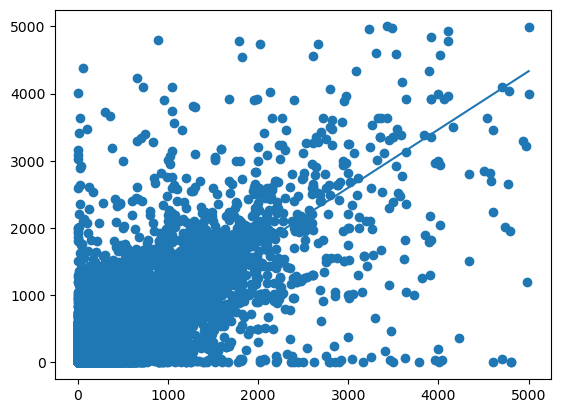

In [46]:
lr = LinearRegression()

lr.fit(X=train_tt[train_tt['conseq_pts'] == 1][['adj_dem_lag1']].values, y=train_tt[train_tt['conseq_pts'] == 1][['adjusted_demand']].values)

plt.scatter(train_tt[train_tt['conseq_pts'] == 1]['adj_dem_lag1'], train_tt[train_tt['conseq_pts'] == 1]['adjusted_demand'])

x = np.linspace(0,5000,101)
y = lr.coef_[0][0] * x + lr.intercept_[0]

plt.plot(x, y)

plt.show()

In [30]:
train_tt[(train_tt['adjusted_demand'] >= 4000) & (train_tt['conseq_pts'] == 1)]

,Week_num,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,ID,ccid,cpid,conseq_pts,adjusted_demand,adj_dem_lag1
7855045,7,1139,8,3402,24510,2604,2683521,220878,94303,1,4340,3080.0
7855201,5,1139,8,3402,853464,2604,2683555,220887,94303,1,4732,2660.0
7855203,7,1139,8,3402,853464,2604,2683555,220887,94303,1,4732,2016.0
9155623,7,1160,8,3601,827594,1167,3300498,280416,129828,1,4608,3312.0
9360208,8,1211,7,3307,64436,2028,3357831,284124,147553,1,4380,60.0
17341175,7,1259,8,3406,1115998,2604,6467046,557323,242902,1,4844,3920.0
17571320,4,1279,8,3407,936020,36439,6538280,561631,252967,1,4020,2130.0
17574554,4,1279,8,3420,894243,1146,6539250,561703,253199,1,4582,3530.0
19159647,4,1314,8,3405,4418370,43040,7090635,606356,272291,1,4000,4000.0
23530826,4,1345,8,5712,966152,4053,8650276,736309,320954,1,4104,720.0


In [32]:
train_tt[train_tt['ID'] == 19723668]

,Week_num,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,ID,ccid,cpid,conseq_pts,adjusted_demand,adj_dem_lag1
53083103,4,2021,1,2820,4383783,30575,19723668,1609479,787340,-2,8,7.0
53083104,5,2021,1,2820,4383783,30575,19723668,1609479,787340,1,4011,8.0
53083105,6,2021,1,2820,4383783,30575,19723668,1609479,787340,1,1,4011.0


In [49]:
# put it all together!

# initialize adjusted demand column
train_pred['adj_dem_guess'] = np.zeros(len(train_pred))

# for ccid and cpid not in training data, set adjusted demand to 5
train_pred.loc[(train_pred['cpid_in_train'] == False) & (train_pred['ccid_in_train'] == False), 'adj_dem_guess'] = 5

# for cpid in training data and ccid not in training data, use cpid median
train_pred.loc[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True), 'adj_dem_guess'] = train_pred[(train_pred['ccid_in_train'] == False) & (train_pred['cpid_in_train'] == True)]['cpid_median']

# for ccid in training data and cpid not in training data, use ccid median
train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False), 'adj_dem_guess'] = train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == False)]['ccid_median']

# for ccid, cpid in training data, use (0.5 + (cpid median pct)) * (0.65 * (ccid median) + (1-0.65) * (ccid mean))
train_pred.loc[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True), 'adj_dem_guess'] = (0.5 + train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['cpid_median_pct'])*(0.65*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_median'] + (1-0.65)*train_pred[(train_pred['ccid_in_train'] == True) & (train_pred['cpid_in_train'] == True)]['ccid_mean'])


print("Means/medians alone:", rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess']))

# override with week 8 adjusted demand for the IDs that have week 8 data
wk8mapping = pd.Series(train_tt[(train_tt['Week_num'] == 8)].set_index('ID')['adjusted_demand'], index=train_tt[(train_tt['Week_num'] == 8)]['ID']).to_dict()
train_pred.loc[train_pred['ID'].isin(train_tt[(train_tt['Week_num'] == 8)]['ID'].unique().tolist()), 'adj_dem_guess'] = train_pred['ID'].map(wk8mapping)

print("Using week 8 adjusted demand for week 9, when possible:", rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess']))

# override with linear regression for adjusted demand for the IDs that have week 8 data
train_pred.loc[train_pred['ID'].isin(train_tt[(train_tt['Week_num'] == 8)]['ID'].unique().tolist()), 'adj_dem_guess'] = lr.predict(train_tt[(train_tt['Week_num'] == 8) & (train_tt['ID'].isin(train_pred['ID'].unique().tolist()) == True)][['adjusted_demand']].values)

print("Using linear regression to predict week 9, when possible:", rmsle(train_ho['adjusted_demand'], train_pred['adj_dem_guess']))



Means/medians alone: 0.6426713245199694
Using week 8 adjusted demand for week 9, when possible: 0.5873339011527177
Using linear regression to predict week 9, when possible: 0.5791414471692989


In [45]:
type(train_tt[(train_tt['Week_num'] == 8) & (train_tt['ID'].isin(train_pred['ID'].unique().tolist()) == True)][['adjusted_demand']])

pandas.core.frame.DataFrame

In [48]:
lr.predict(train_tt[(train_tt['Week_num'] == 8) & (train_tt['ID'].isin(train_pred['ID'].unique().tolist()) == True)][['adjusted_demand']].values)

array([[4.55248327],
       [3.68623298],
       [2.81998268],
       ...,
       [5.41873357],
       [2.81998268],
       [6.28498387]])

In [47]:
lr.predict(X=[[1],[2],[3]])

array([[1.95373238],
       [2.81998268],
       [3.68623298]])